In [1]:
# Importing all the required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [11]:
# Open the property listing website 'nobroker.in' and search for my locality 'sector 19' in Noida. Scrap the url

url = 'https://www.nobroker.in/property/rent/noida/Sector%2019?searchParam=W3sibGF0IjoyOC41Nzc0MDkyLCJsb24iOjc3LjMyMjM5MTUsInBsYWNlSWQiOiJDaElKWmZxTnIxSGtERGtSLThFR1NfdktzQTAiLCJwbGFjZU5hbWUiOiJTZWN0b3IgMTkifV0=&radius=2.0&sharedAccomodation=0&city=noida&locality=Sector%2019#signup-login'

response = requests.get(url)
doc = BeautifulSoup(response.text, 'html')
doc

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch preconnect"/>
<link href="//www.google-analytics.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<link href="https://hs.nobroker.in" rel="dns-prefetch preconnect"/>
<!--<meta charset="utf-8"/>-->
<meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta cont

These are the attributes that I will scrape first
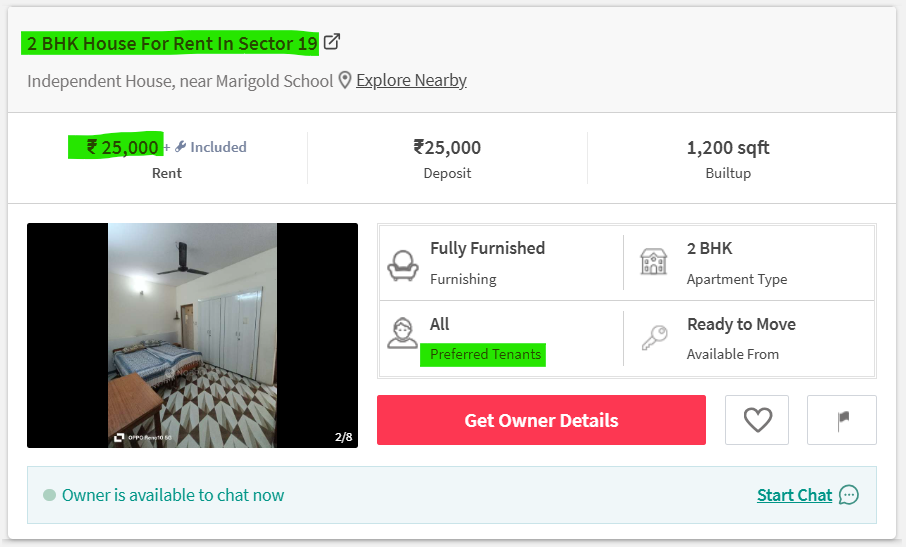

In [12]:
# I will start by counting the total available houses in Sector 19
houses = doc.find_all('h2', class_="flex items-center m-0 heading-6 font-semi-bold")
len(houses)

75

In [13]:
#I will now print the names of the houses to check
names = []

for house in houses:
    a_tags = house.find_all('a')
    for tag in a_tags:
        names.append(tag.get_text(strip=True))

print(names)

['1 BHK House for Rent  In Sector 19', '1 BHK Flat for Rent  In Sector 19', '1 BHK House for Rent  In Sector 19', '2 BHK House for Rent  In Sector 19', '1 BHK House for Rent  In Sector - 19', '1 BHK Villa In Sahay Villa for Rent  In Sector 19', '3 BHK Apartment In Crc Sublimis for Rent  In Sector 1', '2 BHK Flat for Rent  In Sector 19', '2 BHK House for Rent  In Sector 19', '2 BHK House for Rent  In Sector - 19', '2 BHK House for Rent  In Sector 19', '2 BHK House for Rent  In Sector 19', '1 BHK Flat In Standalone Building  for Rent  In Sector 19', '1 BHK House for Rent  In Sector 19', '1 BHK Flat In Standalone Building  for Rent  In Sector-19', '2 BHK Apartment In Crc Sublimis, Sector 1 for Rent  In Sector 1', '1 RK Flat for Rent  In  Sector 19,', '3 BHK House for Rent  In Sector 19', '1 RK Flat In Standalone Building  for Rent  In Sector 19', '1 RK House for Rent  In  Sector 19', '1 RK House for Rent  In Sector 19,pocket B', '4 BHK House for Rent  In Sector 19', '2 BHK House for Rent 

In [16]:
#As the listing page suggested houses from nearby sectors as well, my scraping got me houses from other nearby sectors as well. I will rerun my scraper so that it only shows those houses which have '19' in their listed title.

names = []

for house in houses:
    a_tags = house.find_all('a')
    for tag in a_tags:
        text = tag.get_text(strip=True)
        if '19' in text:
            names.append(text)
names

['1 BHK House for Rent  In Sector 19',
 '1 BHK Flat for Rent  In Sector 19',
 '1 BHK House for Rent  In Sector 19',
 '2 BHK House for Rent  In Sector 19',
 '1 BHK House for Rent  In Sector - 19',
 '1 BHK Villa In Sahay Villa for Rent  In Sector 19',
 '2 BHK Flat for Rent  In Sector 19',
 '2 BHK House for Rent  In Sector 19',
 '2 BHK House for Rent  In Sector - 19',
 '2 BHK House for Rent  In Sector 19',
 '2 BHK House for Rent  In Sector 19',
 '1 BHK Flat In Standalone Building  for Rent  In Sector 19',
 '1 BHK House for Rent  In Sector 19',
 '1 BHK Flat In Standalone Building  for Rent  In Sector-19',
 '1 RK Flat for Rent  In  Sector 19,',
 '3 BHK House for Rent  In Sector 19',
 '1 RK Flat In Standalone Building  for Rent  In Sector 19',
 '1 RK House for Rent  In  Sector 19',
 '1 RK House for Rent  In Sector 19,pocket B',
 '4 BHK House for Rent  In Sector 19',
 '2 BHK House for Rent  In Sector 19',
 '2 BHK Flat In Any Society for Rent  In Sector 19',
 '1 RK Villa In Residents 19 Forum 

In [18]:
#Oh no! I also needed to scrap the href of each house to later. So I rerun my scraper

results = []

for house in houses:
    a_tag = house.find('a')
    if a_tag:
        name = a_tag.get_text(strip=True)
        href = a_tag.get('href')
        if '19' in name:
            results.append({'name': name, 'url': href})

# Output as list of dicts
for item in results:
    print(item)

{'name': '1 BHK House for Rent  In Sector 19', 'url': '/property/1-bhk-apartment-for-rent-in-sector-19-noida-for-rs-11000/8a9f90827cc090d1017cc0e71d0a35da/detail'}
{'name': '1 BHK Flat for Rent  In Sector 19', 'url': '/property/1-bhk-apartment-for-rent-in-sector-19-noida-for-rs-19000/8a9f8b8a7052cb5e017052e56e290cda/detail'}
{'name': '1 BHK House for Rent  In Sector 19', 'url': '/property/1-bhk-apartment-for-rent-in-sector-19-noida-for-rs-23000/8a9fb6827f154d5f017f15ebf831711b/detail'}
{'name': '2 BHK House for Rent  In Sector 19', 'url': '/property/2-bhk-apartment-for-rent-in-sector-19-noida-for-rs-25000/8a9f8a8c980c7f3101980c8ed9e7058d/detail'}
{'name': '1 BHK House for Rent  In Sector - 19', 'url': '/property/1-bhk-apartment-for-rent-in-sector---19-noida-for-rs-19000/8a9f878e97365846019736734bd90584/detail'}
{'name': '1 BHK Villa In Sahay Villa for Rent  In Sector 19', 'url': '/property/1-bhk-apartment-for-rent-in-sector-19-noida-for-rs-15000/8a9fa1827bc3938e017bc3dc01de1907/detail'

In [19]:
# Now I have all the houses available for rent in Sector 19 and their respective hrefs. I will add these in a dataframe.

df = pd.DataFrame(results)
df

,name,url
0,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...
1,1 BHK Flat for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...
2,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...
3,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...
4,1 BHK House for Rent In Sector - 19,/property/1-bhk-apartment-for-rent-in-sector--...
5,1 BHK Villa In Sahay Villa for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...
6,2 BHK Flat for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...
7,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...
8,2 BHK House for Rent In Sector - 19,/property/2-bhk-apartment-for-rent-in-sector--...
9,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...


In [20]:
#It is time to add other attributes.
#Learnings from Leon's undocumented API classes helped me find a way to get all the required attributes. Here's how

headers = {
    'sec-ch-ua-platform': '"macOS"',
    'X-User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36',
    'Referer': 'https://www.nobroker.in/property/1-bhk-apartment-for-rent-in-sector-19-noida-for-rs-19000/8a9f8b8a7052cb5e017052e56e290cda/detail?nbFr=list-rent',
    'sec-ch-ua': '"Not)A;Brand";v="8", "Chromium";v="138", "Google Chrome";v="138"',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36',
    'Accept': 'application/json',
    'X-Request-Timeout': '10000',
}

params = {
    'nbFr': 'list-rent',
}

attributes = requests.get(
    'https://www.nobroker.in/api/v3/property/8a9f8b8a7052cb5e017052e56e290cda',
    params=params,
    headers=headers,
)
attributes.json()

{'status': 'success',
 'version': 1.0,
 'status_code': 200,
 'statusCode': 200,
 'message': 'success',
 'otherParams': {'id': '8a9f8b8a7052cb5e017052e56e290cda',
  'selfListing': False,
  'allowCloning': True},
 'seoData': {},
 'data': {'sponsored': True,
  'buildingId': None,
  'shortlistedByLoggedInUser': False,
  'id': '8a9f8b8a7052cb5e017052e56e290cda',
  'shortUrl': 'http://nobr.kr/sy/dMK8Q2',
  'description': "This 1BHK for rent in Sector 19 is perfect for families & bachelors as it is spacious and comfortable with an area of 550 sq. ft. This fully furnished apartment is at a great price of just 19,000 rupees.\n\nWith amenities such as security this home offers you a lot of convenience.\n\nBeing situated near Metro Hospital & Heart Institute, Max Multi Speciality Centre , Noida and Kailash Hospital, Noida, emergency care is very easily available at any time. With Noida Film City, Apeejay School - Noida and Pranava Yoga Academy close to this home, you'll be able to provide your ch

In [25]:
#I just have to change the property ID in https://www.nobroker.in/api/v3/property/{propertyID} to get all the required attributes for each house
#The property ID is at the end of URLs I scraped earlier
#So first I will separate the property IDs from URLs and put them in a list
for item in results:
    url = item['url']
    # Split the URL by "/" and get the second-to-last part
    property_id = url.strip('/').split('/')[-2]
df = pd.DataFrame(results)
df.head()

,name,url,property_id
0,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f90827cc090d1017cc0e71d0a35da
1,1 BHK Flat for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f8b8a7052cb5e017052e56e290cda
2,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9fb6827f154d5f017f15ebf831711b
3,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f8a8c980c7f3101980c8ed9e7058d
4,1 BHK House for Rent In Sector - 19,/property/1-bhk-apartment-for-rent-in-sector--...,8a9f878e97365846019736734bd90584


In [28]:
import time  

for item in results:
    property_id = item['property_id']
    api_url = f'https://www.nobroker.in/api/v3/property/{property_id}'
    try:
        response = requests.get(api_url)
        data = response.json().get('data', {})

        # Extract required fields with .get() for safety
        item['leaseType'] = data.get('leaseType')
        item['latitude'] = data.get('latitude')
        item['longitude'] = data.get('longitude')
        item['rent'] = data.get('rent')
        item['typeDesc'] = data.get('typeDesc')
        item['non_veg_allowed'] = data.get('NON_VEG_ALLOWED', {}).get('display_value')

        time.sleep(0.5)

    except Exception as e:
        print(f"Failed to fetch data for {property_id}: {e}")
        item['leaseType'] = None
        item['latitude'] = None
        item['longitude'] = None
        item['rent'] = None
        item['typeDesc'] = None
        item['non_veg_allowed'] = None
df = pd.DataFrame(results)
df

,name,url,property_id,leaseType,latitude,longitude,rent,typeDesc,non_veg_allowed
0,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f90827cc090d1017cc0e71d0a35da,BACHELOR,28.581014,77.326624,11000,1 BHK,None
1,1 BHK Flat for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f8b8a7052cb5e017052e56e290cda,ANYONE,28.580011,77.327426,19000,1 BHK,None
2,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9fb6827f154d5f017f15ebf831711b,FAMILY,28.579174,77.324482,23000,1 BHK,None
3,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f8a8c980c7f3101980c8ed9e7058d,ANYONE,28.578988,77.322934,25000,2 BHK,None
4,1 BHK House for Rent In Sector - 19,/property/1-bhk-apartment-for-rent-in-sector--...,8a9f878e97365846019736734bd90584,BACHELOR,28.574269,77.322983,19000,1 BHK,None
5,1 BHK Villa In Sahay Villa for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9fa1827bc3938e017bc3dc01de1907,ANYONE,28.574257,77.322952,15000,1 BHK,None
6,2 BHK Flat for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9fab8280b149ac0180b16dbb0a0d63,FAMILY,28.577234,77.327036,35000,2 BHK,None
7,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f93887766ba4b017766f6d9ab184f,ANYONE,28.580576,77.326085,30000,2 BHK,None
8,2 BHK House for Rent In Sector - 19,/property/2-bhk-apartment-for-rent-in-sector--...,8a9f918282cf5b890182cfa1d8722ff7,FAMILY,28.574263,77.322951,25000,2 BHK,None
9,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f8e869758413d0197598f40860f3e,ANYONE,28.577409,77.322391,20000,2 BHK,None


In [31]:
#I got all the attributes that I needed except for NON-VEG ALLOWED. Since it had another nested dictionary inside it, I will try it differently

for item in results:
    property_id = item['property_id']
    api_url = f"https://www.nobroker.in/api/v3/property/{property_id}"

    try:
        response = requests.get(api_url)
        data = response.json().get('data', {})

        # Extract from nested structure: data['aea__']['NON_VEG_ALLOWED']['display_value']
        non_veg_info = data.get('aea__', {}).get('NON_VEG_ALLOWED')
        if isinstance(non_veg_info, dict):
            item['non_veg_allowed'] = non_veg_info.get('display_value')
        else:
            item['non_veg_allowed'] = None

        time.sleep(0.5)

    except Exception as e:
        print(f"Error fetching NON_VEG_ALLOWED for {property_id}: {e}")
        item['non_veg_allowed'] = None

df = pd.DataFrame(results)
df

,name,url,property_id,leaseType,latitude,longitude,rent,typeDesc,non_veg_allowed
0,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f90827cc090d1017cc0e71d0a35da,BACHELOR,28.581014,77.326624,11000,1 BHK,Yes
1,1 BHK Flat for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9f8b8a7052cb5e017052e56e290cda,ANYONE,28.580011,77.327426,19000,1 BHK,Yes
2,1 BHK House for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9fb6827f154d5f017f15ebf831711b,FAMILY,28.579174,77.324482,23000,1 BHK,Yes
3,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f8a8c980c7f3101980c8ed9e7058d,ANYONE,28.578988,77.322934,25000,2 BHK,No
4,1 BHK House for Rent In Sector - 19,/property/1-bhk-apartment-for-rent-in-sector--...,8a9f878e97365846019736734bd90584,BACHELOR,28.574269,77.322983,19000,1 BHK,Yes
5,1 BHK Villa In Sahay Villa for Rent In Sector 19,/property/1-bhk-apartment-for-rent-in-sector-1...,8a9fa1827bc3938e017bc3dc01de1907,ANYONE,28.574257,77.322952,15000,1 BHK,Yes
6,2 BHK Flat for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9fab8280b149ac0180b16dbb0a0d63,FAMILY,28.577234,77.327036,35000,2 BHK,Yes
7,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f93887766ba4b017766f6d9ab184f,ANYONE,28.580576,77.326085,30000,2 BHK,Yes
8,2 BHK House for Rent In Sector - 19,/property/2-bhk-apartment-for-rent-in-sector--...,8a9f918282cf5b890182cfa1d8722ff7,FAMILY,28.574263,77.322951,25000,2 BHK,Yes
9,2 BHK House for Rent In Sector 19,/property/2-bhk-apartment-for-rent-in-sector-1...,8a9f8e869758413d0197598f40860f3e,ANYONE,28.577409,77.322391,20000,2 BHK,Yes


In [32]:
df.to_csv("housing.csv")